## **1. data akuisisi**


---







In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("star_classification.xlsx")

In [3]:
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1237660961327743232,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1237664879951151360,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1237660961330430208,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1237663478724297984,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1237680272041378048,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1237678879964201472,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1237679476408648192,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1237668298220634368,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1237661151383454208,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


## **2. data preprocessing**

---



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  int64  
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(9), int64(8), 

## 3. **Expolere Data Analysys (EDA)**
Data yang kita gunakan terdiri dari 6 fitur varibel adan 1 variabel kelas, dimana 6 fitur variabel tersebut adalah:
1. U = intensitas cahaya dengan flux 3551 Amstrong
2. G =  intensitas cahaya dengan flux 4686 Amstrong
3. R =  intensitas cahaya dengan flux 6166 Amstrong
4. I =  intensitas cahaya dengan flux 7480 Amstrong
5. Z =  intensitas cahaya dengan flux 8932 Amstrong
6. Redshift = pengukuran objek berdasarkan pergerakan relatif objek terhadap bumi
Selain itu, terdapat beberapa fitur lainnya, diantara lain:
1. Obj_id 
2. Run, rerun, camcol, field = deskripsi bidang pada gambar
3. Plate = nomor piringan
4. Mjd = waktu julian date
5. Fiberid = optic fiber ID

In [5]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [6]:
df.value_counts()

obj_ID               alpha       delta      u         g         r         i         z         run_ID  rerun_ID  cam_col  field_ID  spec_obj_ID   class   redshift   plate  MJD    fiber_ID
1237645942904389888  54.555776   0.223247   22.19868  19.84683  18.37413  17.12478  16.43615  109     301       4        133       1.708153e+18  STAR    -0.000108  1517   52934  594         1
1237666408436662784  346.813606  0.237403   22.40424  22.55051  21.89516  21.80979  21.53271  4874    301       4        333       1.030558e+19  QSO      1.056327  9153   58022  791         1
1237666408438890752  351.952453  0.327165   21.77470  21.24958  17.80189  16.77208  18.78058  4874    301       4        367       4.313802e+17  STAR     0.000032  383    51818  584         1
1237666408438890496  352.010248  0.252091   18.65186  17.67476  17.37201  17.26593  17.19822  4874    301       4        367       9.868703e+18  STAR    -0.000956  8765   57307  691         1
1237666408438825216  351.814631  0.313234   2

In [7]:
df.cov()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
obj_ID,7.120929e+25,-1.118499e+13,-4.993681e+13,4.104389e+12,4.209231e+12,2.408626e+12,2.190548e+12,3.697865e+12,1.657978e+16,0.0,-6.293507e+11,3.960622e+13,6.716847e+30,4.032653e+11,5.965720e+15,4.008871e+15,1.544743e+14
alpha,-1.118499e+13,9.312682e+03,2.629241e+02,-4.695842e+00,-7.422666e+00,-3.952593e+00,-4.000132e+00,-8.933732e+00,-2.604547e+03,0.0,2.998821e+00,-2.380979e+03,-8.190697e+17,1.175579e-01,-7.276757e+02,3.480548e+03,8.010969e+02
delta,-4.993681e+13,2.629241e+02,3.859129e+02,1.294097e+00,2.197617e+00,-2.490271e-01,-1.547185e-01,2.262319e+00,-1.162694e+04,0.0,1.015189e+00,-5.076369e+02,7.334983e+18,4.541536e-01,6.514736e+03,3.813226e+03,1.512254e+02
u,4.104389e+12,-4.695842e+00,1.294097e+00,1.009288e+03,1.007989e+03,3.190689e+00,2.553903e+00,1.006058e+03,9.556058e+02,0.0,1.788911e-01,-3.964403e+01,3.167703e+18,3.321681e-01,2.813451e+03,1.838362e+03,1.411519e+02
g,4.209231e+12,-7.422666e+00,2.197617e+00,1.007989e+03,1.008081e+03,3.673939e+00,3.140701e+00,1.006533e+03,9.800164e+02,0.0,1.767692e-01,-4.188022e+01,4.162803e+18,5.325377e-01,3.697275e+03,2.312548e+03,1.511469e+02
r,2.408626e+12,-3.952593e+00,-2.490271e-01,3.190689e+00,3.673939e+00,3.440134e+00,3.139404e+00,3.158788e+00,5.607988e+02,0.0,2.495887e-02,-7.302882e+00,4.039749e+18,5.871653e-01,3.587990e+03,2.251342e+03,1.127620e+02
i,2.190548e+12,-4.000132e+00,-1.547185e-01,2.553903e+00,3.140701e+00,3.139404e+00,3.090194e+00,3.123057e+00,5.100242e+02,0.0,2.124163e-02,-6.988373e+00,3.866149e+18,6.324697e-01,3.433805e+03,2.138034e+03,1.028882e+02
z,3.697865e+12,-8.933732e+00,2.262319e+00,1.006058e+03,1.006533e+03,3.158788e+00,3.123057e+00,1.006676e+03,8.609558e+02,0.0,1.694101e-01,-4.209063e+01,3.987927e+18,7.043310e-01,3.541960e+03,2.149987e+03,1.268219e+02
run_ID,1.657978e+16,-2.604547e+03,-1.162694e+04,9.556058e+02,9.800164e+02,5.607988e+02,5.100242e+02,8.609558e+02,3.860300e+06,0.0,-1.468469e+02,9.221667e+03,1.563890e+21,9.389253e+01,1.389004e+06,9.333908e+05,3.595979e+04
rerun_ID,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [8]:
df.corr()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
obj_ID,1.000000,-0.013735,-0.301237,0.015310,0.015710,0.153891,0.147670,0.013811,1.000000,NaN,-0.046997,0.031498,0.239461,0.065400,0.239460,0.262687,0.067178
alpha,-0.013735,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,NaN,0.019582,-0.165577,-0.002553,0.001667,-0.002554,0.019943,0.030464
delta,-0.301237,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,NaN,0.032565,-0.173416,0.112329,0.031638,0.112329,0.107333,0.028250
u,0.015310,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,NaN,0.003548,-0.008374,0.029997,0.014309,0.029997,0.031997,0.016305
g,0.015710,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,NaN,0.003508,-0.008852,0.039443,0.022954,0.039443,0.040274,0.017470
r,0.153891,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,NaN,0.008480,-0.026423,0.655245,0.433241,0.655243,0.671180,0.223106
i,0.147670,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,NaN,0.007615,-0.026679,0.661641,0.492383,0.661640,0.672523,0.214787
z,0.013811,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,NaN,0.003365,-0.008903,0.037813,0.030380,0.037813,0.037469,0.014668
run_ID,1.000000,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,NaN,-0.047098,0.031498,0.239460,0.065400,0.239459,0.262687,0.067165
rerun_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **4. VISUALISASI DATA**

In [9]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [10]:
df[df['class']=='QSO']

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
5,1237680272039609088,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1237678858481565952,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
17,1237678598091112704,1.494389,3.291746,20.38562,20.40514,20.29996,20.05918,19.89044,7712,301,5,339,9.843824e+18,QSO,2.031528,8743,57663,295
23,1237657589775401216,145.883006,47.300484,21.73992,21.53095,21.26763,21.36257,21.15861,2821,301,2,33,8.228240e+18,QSO,2.075680,7308,56709,596
33,1237678858480189696,20.052556,11.497881,21.89214,21.35124,21.18755,20.84300,20.76580,7773,301,2,441,1.246830e+19,QSO,1.528308,11074,58488,306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99961,1237655108364272384,134.347759,47.771911,24.17897,22.89025,21.26451,20.94941,19.87500,2243,301,4,128,8.458979e+18,QSO,0.219966,7513,56780,339
99966,1237662223544287488,222.761686,32.203212,20.23421,19.76480,19.46940,19.36135,19.21768,3900,301,1,583,4.356138e+18,QSO,0.398574,3869,55273,112
99968,1237655504036759040,259.504325,31.462416,24.86685,23.22772,21.82982,21.80359,21.56733,2335,301,5,107,1.312146e+19,QSO,1.239638,11654,58543,812
99977,1237661386532455168,217.958430,52.316738,24.15617,22.05986,21.80826,21.95129,21.24179,3705,301,2,124,7.916218e+18,QSO,1.067543,7031,56449,58


In [11]:
qso=df[df['class']=='QSO']

In [12]:
star=df[df['class']=='STAR']

In [13]:
galaxy=df[df['class']=='GALAXY']

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

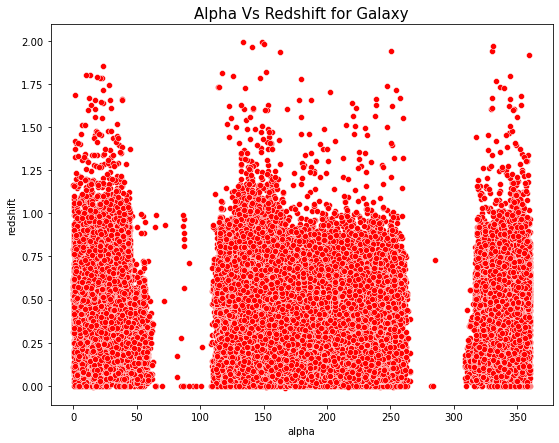

In [15]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='alpha',y='redshift',data=galaxy,color='red');
plt.title("Alpha Vs Redshift for Galaxy",{'fontsize':15});

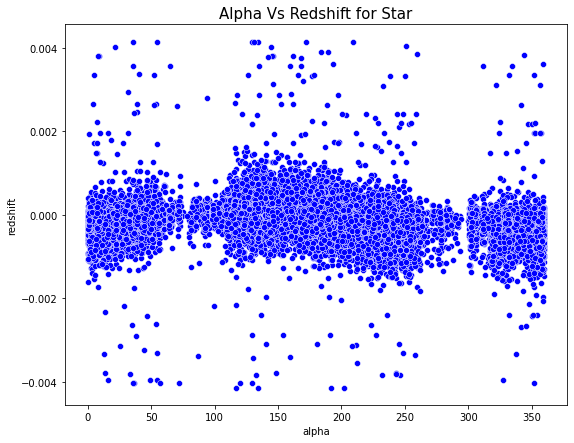

In [16]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='alpha',y='redshift',data=star,color='blue');
plt.title("Alpha Vs Redshift for Star",{'fontsize':15});

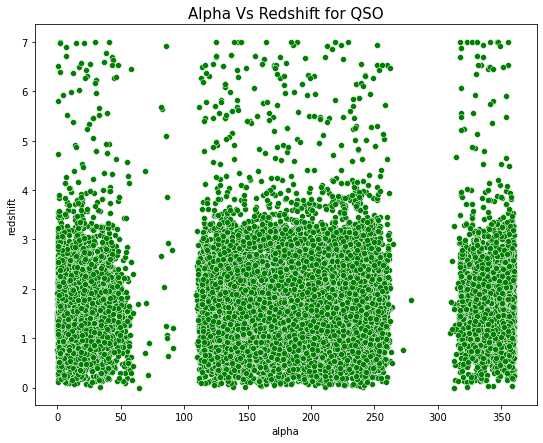

In [17]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='alpha',y='redshift',data=qso, color='green');
plt.title("Alpha Vs Redshift for QSO",{'fontsize':15});

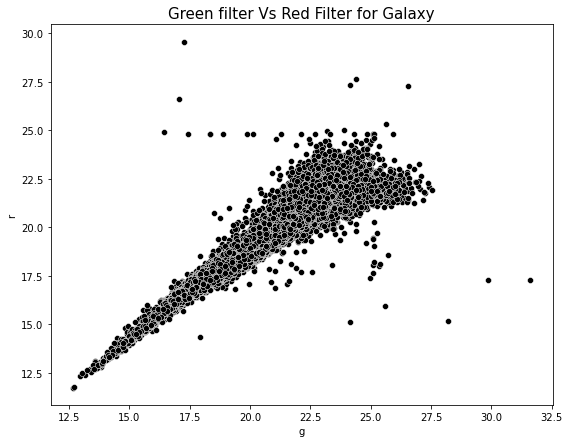

In [18]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='g',y='r',data=galaxy,color='black');
plt.title("Green filter Vs Red Filter for Galaxy",{'fontsize':15});

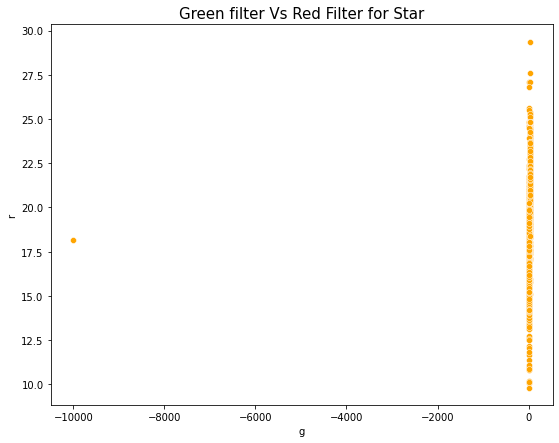

In [19]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='g',y='r',data=star,color='orange')
plt.title("Green filter Vs Red Filter for Star",{'fontsize':15});

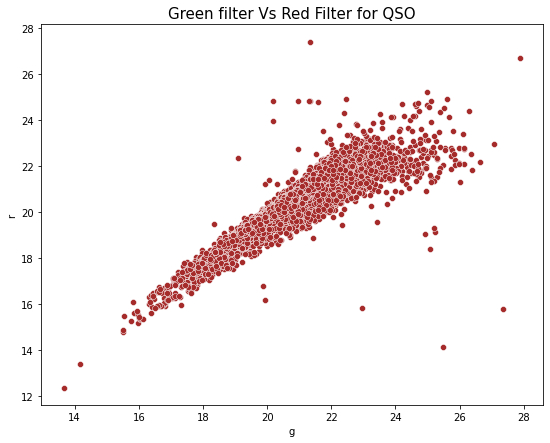

In [20]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='g',y='r',data=qso,color='brown');
plt.title("Green filter Vs Red Filter for QSO",{'fontsize':15});

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


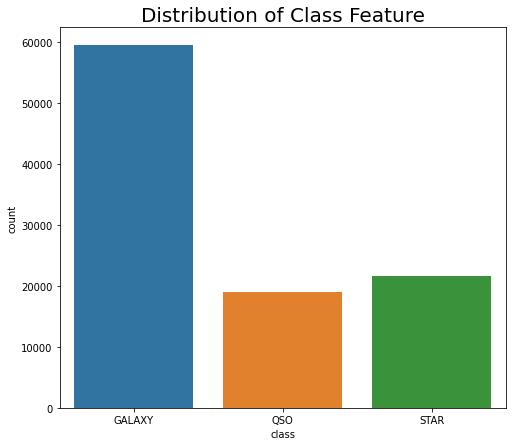

In [21]:
plt.figure(figsize=(8,7))
sns.countplot(df['class']);
plt.title("Distribution of Class Feature",{'fontsize':20});

In [22]:
df = df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z','redshift','class']]
df.head()

,alpha,delta,u,g,r,i,z,redshift,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY


In [23]:
df['class'].dtype

dtype('O')

In [24]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

## **5. MODELLING AND EVALUATION**

Menggunakan beberapa algoritma, diantaranya:
1. random forest
2. SVM
3. KNN
4. Decision Tree

disini kita gunakan K-cross validation dan GridSearchCV

**modeling with K-cross vaidation and gridsearchcv**

## **B. RANDOM FOREST**

In [25]:
# import libraries
import pandas as pd #untuk menganalisa, memanipulatif, mengubah dimensi,mengecek data. memudahkan kita untuk membaca file dengan berbagai format. contoh, .csv , .json dan banyak lagi
import itertools #library fungsional (contoh, funsgi count untuk menghitung sebuah nilai. Fungsi cycle, mengulang sebuah pengulangan sebagai contoh sebuah list/string)
import numpy as np #melakukan operasi vektor dan matrix dengan mengolah array
import matplotlib.pyplot as plt #untuk visualisasi data seperti membuat plot grafik unntuk satu sumbu/lebih.
from scipy import stats

#library sckit-learn
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

%matplotlib inline

In [26]:
df.keys()

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift', 'class'], dtype='object')

In [27]:
X = df.drop('class',axis=1)
y = df['class']

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(le_name_mapping)

{0: 0, 1: 1, 2: 2}


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)

In [30]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test  = scalar.transform(X_test)

In [31]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
param_gridRFC = { 
    'n_estimators': [200, 500],
    'criterion' :['gini', 'entropy']
}

In [33]:
gridRFC = GridSearchCV(rfc, param_gridRFC, cv=3, scoring='accuracy', return_train_score=False,verbose=1)

In [34]:
grid_searchRFC=gridRFC.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [35]:
print(grid_searchRFC.best_params_)

{'criterion': 'entropy', 'n_estimators': 200}


In [36]:
accuracyRFC = grid_searchRFC.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracyRFC) )

Accuracy for our training dataset with tuning is : 97.76%


In [37]:
model = RandomForestClassifier(criterion='gini', n_estimators=200)

In [38]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [39]:
model.predict([[135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794]])

array([1])

In [40]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
def evaluate_model(model):
    print("Train Accuracy :", accuracy_score(y_train, model.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, model.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, model.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, model.predict(X_test)))

In [50]:
evaluate_model(model)

Train Accuracy : 1.0
Train Confusion Matrix:
[[47501     0     0]
 [    0 15230     0]
 [    0     0 17269]]
--------------------------------------------------
Test Accuracy : 0.97745
Test Confusion Matrix:
[[11793   120    31]
 [  298  3433     0]
 [    2     0  4323]]


In [52]:
from sklearn.metrics import classification_report

y_predict = model.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict, digits=3))

              precision    recall  f1-score   support

           0      0.975     0.988     0.981     11944
           1      0.968     0.920     0.943      3731
           2      0.993     1.000     0.996      4325

    accuracy                          0.978     20000
   macro avg      0.979     0.969     0.974     20000
weighted avg      0.978     0.978     0.978     20000

